<a href="https://colab.research.google.com/github/Paolino1994/Vision-por-computadora/blob/main/TP1/TP1_VPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

#Parte 1

In [ ]:
# Cargar una imagen en modo monocromático (un canal)
img = cv.imread('wp_red.png')

# Como lucen los datos en un np.array
print(img.shape)

# Dimensión de la imagen
print(f'Tamaño imagen: {img.shape} pix')
#print(img)

(813, 481, 3)
Tamaño imagen: (813, 481, 3) pix


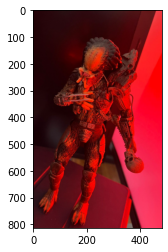

In [ ]:
image = cv.cvtColor(img, cv.COLOR_BGR2RGB )
plt.imshow(image)
plt.show()

In [ ]:
def coord_cromaticas(image):
  
  cols=image.shape[0]
  rows=image.shape[1]
  arraySum=np.sum(image,axis = 2,keepdims=True)  
  im2=np.where((arraySum>0) &(image>0),image/arraySum,0)
  return im2
    


In [ ]:
def white_patch(im):
  image = im.copy()
  
  maxRed=max(image[:,:,0].flatten())
  maxGreen=max(image[:,:,1].flatten())
  maxBlue=max(image[:,:,2].flatten())
  #print(maxRed,maxGreen,maxBlue)
  image[:,:,0]=image[:,:,0]*(255/maxRed)
  image[:,:,1]=image[:,:,1]*(255/maxGreen)
  image[:,:,2]=image[:,:,2]*(255/maxBlue)
  return image
  




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


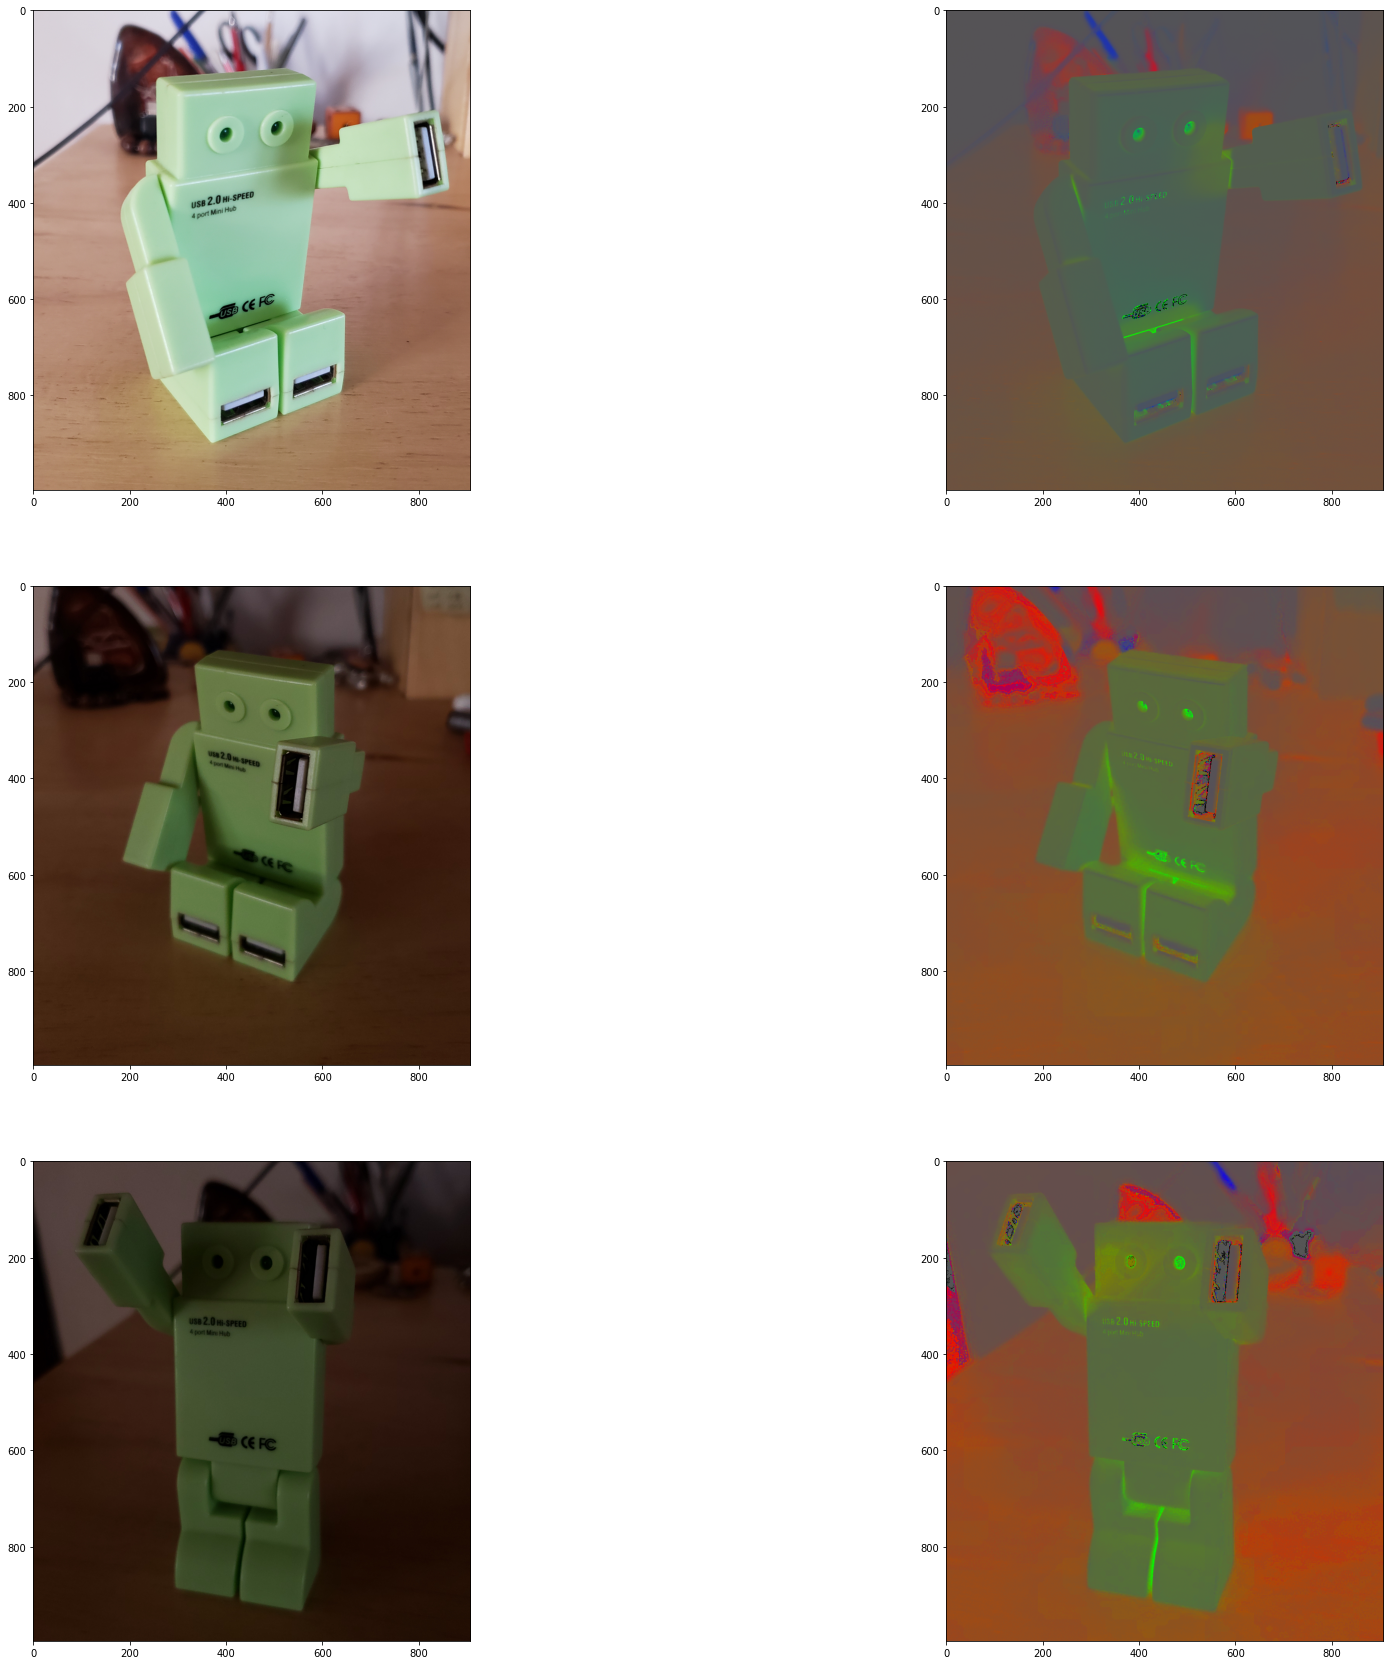

In [ ]:
#Test coordenadas cromaticas
images=["CoordCrom_1.png","CoordCrom_2.png","CoordCrom_3.png"]
fig, ax = plt.subplots(3, 2, figsize=(30,30))
counter=0
for image in images:
  img = cv.imread(image)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB )
  ax[counter][0].imshow(img)
  img2=coord_cromaticas(img)
  ax[counter][1].imshow(img2)
  counter+=1  
#im2=white_patch(image)


165 138 200
210 250 171
247 157 175
255 255 255
126 252 155
170 255 172
255 134 122
255 201 203


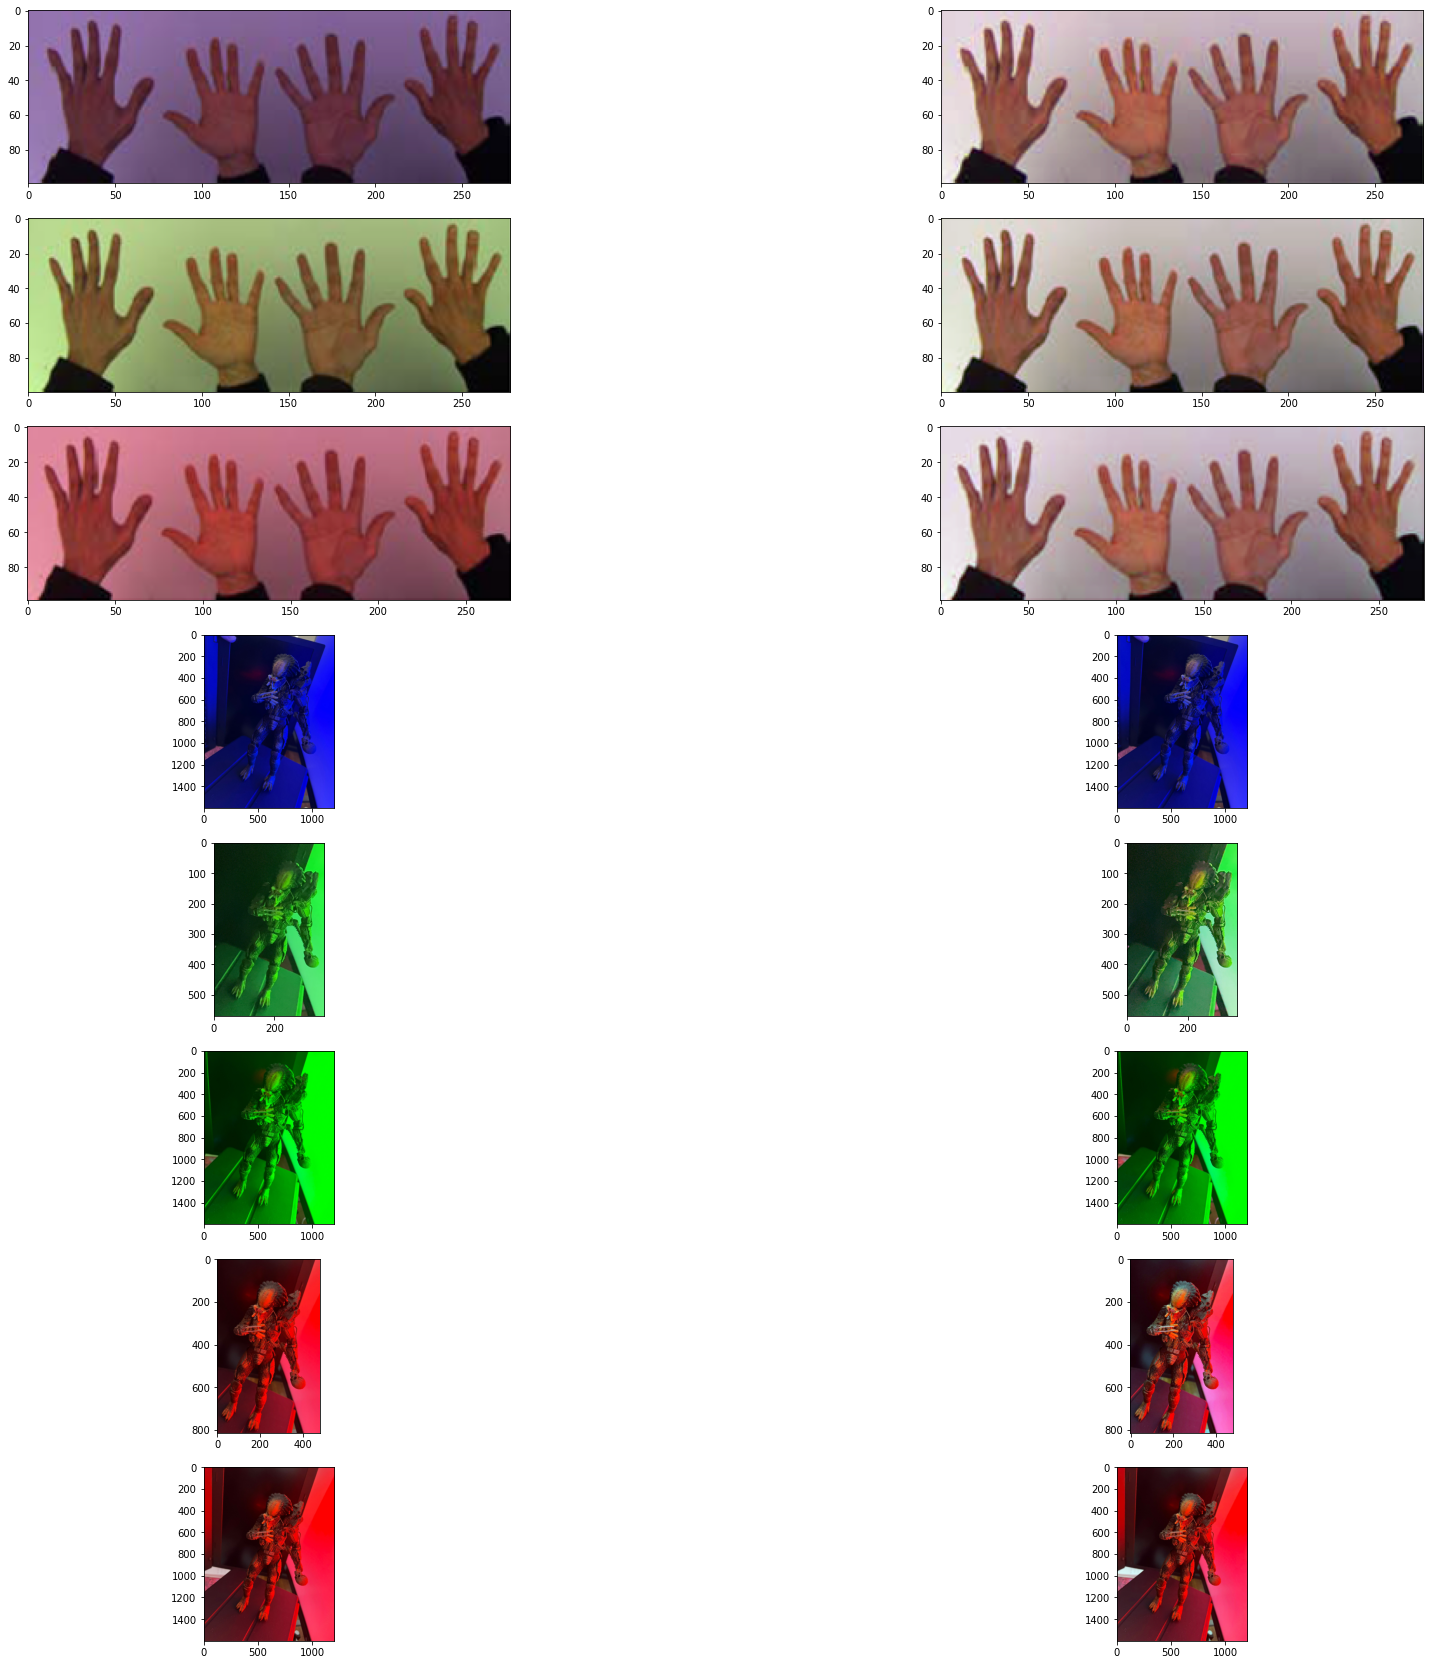

In [ ]:
#Test white patch
images=["test_blue.png","test_green.png","test_red.png","wp_blue.jpg","wp_green.png","wp_green2.jpg","wp_red.png","wp_red2.jpg"]
fig, ax = plt.subplots(8, 2, figsize=(30,30))
counter=0
for image in images:
  img = cv.imread(image)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB )
  ax[counter][0].imshow(img)
  img2=white_patch(img)
  ax[counter][1].imshow(img2)

  counter+=1
#im2=white_patch(image)


###Si cada canal satura al menos un pixel, el algoritmo no hace nada, para solucionarlo se me ocurre que podriamos o ignorar los extremos o podemos hacer algun tipo de "lavado" de la imagen para que no sature y por lo tanto el algoritmo funcione mejor.

#Parte 2



In [ ]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)

img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)


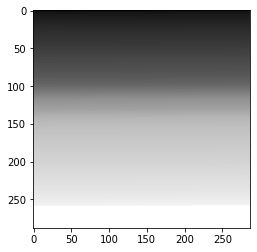

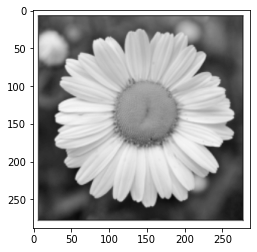

In [ ]:
plt.imshow(img1,cmap='gray')
plt.show()
plt.imshow(img2,cmap='gray')
plt.show()

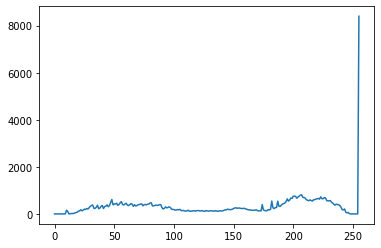

In [ ]:
histr=cv.calcHist([img1],[0],None,[256],[0,256]) 
plt.plot(histr)
plt.show()

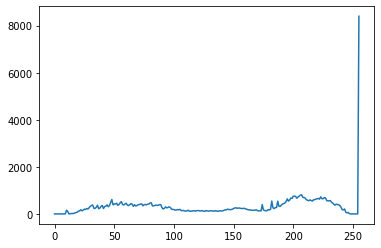

In [ ]:
histr=cv.calcHist([img2],[0],None,[256],[0,256]) 
plt.plot(histr)
plt.show()

Como ambos histogramas son iguales significa que las imagenes son practicamente iguales, pero los pixeles estan en diferente orden, lo cuul no me aportaria nada para un modelo de ML

In [ ]:
segmentacionBRG = cv.imread('segmentacion.png')
segmentacion = cv.cvtColor(segmentacionBRG, cv.COLOR_BGR2RGB )

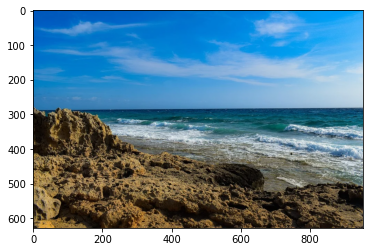

In [ ]:
plt.imshow(segmentacion)
plt.show()

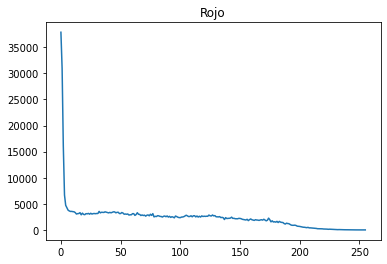

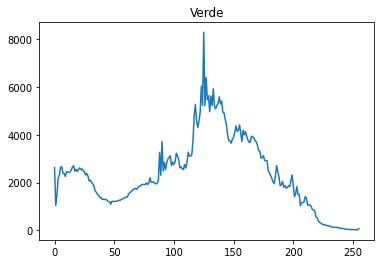

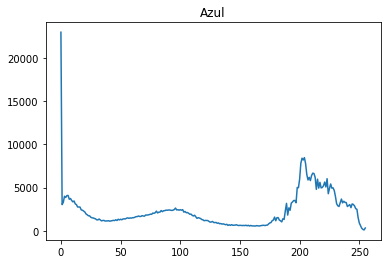

In [ ]:
#Rojo
histr=cv.calcHist([segmentacion[:,:,0]],[0],None,[256],[0,256]) 
plt.title("Rojo")
plt.plot(histr)
plt.show()
#Verde
histr=cv.calcHist([segmentacion[:,:,1]],[0],None,[256],[0,256]) 
plt.title("Verde")
plt.plot(histr)
plt.show()
#Azul
plt.title("Azul")
histr=cv.calcHist([segmentacion[:,:,2]],[0],None,[256],[0,256]) 
plt.plot(histr)
plt.show()

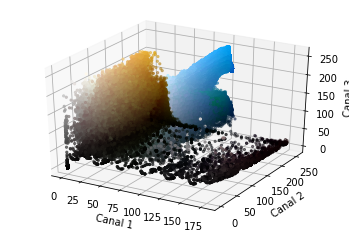

In [ ]:
img_color=segmentacionBRG
imgRGB=segmentacion
img_HSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)

c1, c2, c3 = cv.split(imgRGB)
c1, c2, c3 = cv.split(img_HSV)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

## Agua

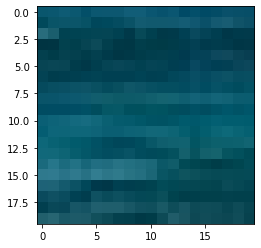

[ 98 243 102]


In [ ]:
img_muestra = imgRGB[300:320,600:620,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()


print(img_HSV[300,620,:])



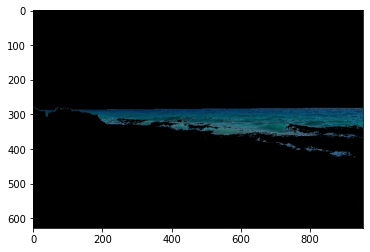

In [ ]:
#Agua
color_l = (50, 100, 0)
color_u = (120, 255, 150)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(segmentacion, segmentacion, mask=mask)
plt.imshow(img_segmentada)
plt.show()


##Cielo

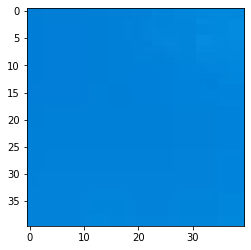

[102 255 214]


In [ ]:
img_muestra = imgRGB[80:120,450:490,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()


print(img_HSV[100,450,:])



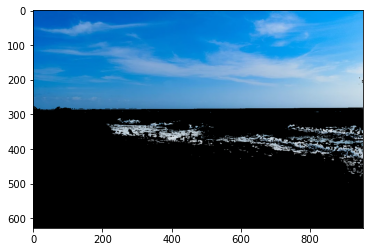

In [ ]:
#Cielo
color_l = (100, 0, 170)
color_u = (255, 255, 255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(segmentacion, segmentacion, mask=mask)
plt.imshow(img_segmentada)
plt.show()


##Tierra

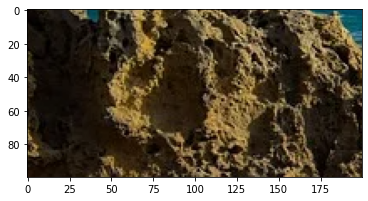

[  0 255   4]


In [ ]:
img_muestra = imgRGB[300:400,0:200,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()


print(img_HSV[325,12,:])



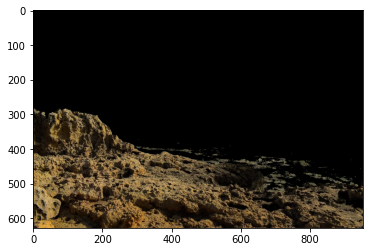

In [ ]:
#Tierra
color_l = (0, 50, 0)
color_u = (70, 255, 255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(segmentacion, segmentacion, mask=mask)
plt.imshow(img_segmentada)
plt.show()
